# Bike Sharing Data Set - Final Project

### Data Loading

In [6]:
import pandas as pd
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Separate categorical and numerical features from target
category_features = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed']
features = category_features + number_features
target = ['cnt']

# Dropped information: 
dropped_features = ['instant', 'dteday', 'yr', 'casual', 'registered']
# Note: casual and registered are part of the target since target (cnt) = casual + registered
# Note2: instant, dteday and year are irrelevant information for the model since they are the registration number and datastamp for each collected data and this is not a timeseries analysis


### Descriptive Analysis

In [4]:
print(hour_df[number_features].describe())

               temp         atemp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.627229      0.190098
std        0.192556      0.171850      0.192930      0.122340
min        0.020000      0.000000      0.000000      0.000000
25%        0.340000      0.333300      0.480000      0.104500
50%        0.500000      0.484800      0.630000      0.194000
75%        0.660000      0.621200      0.780000      0.253700
max        1.000000      1.000000      1.000000      0.850700


In [ ]:
for col in category_features:
    hour_df[col] = hour_df[col].astype('category') # Register each categorical value as category
print(hour_df[category_features].describe())

        season  holiday   mnth     hr  weekday  workingday  weathersit
count    17379    17379  17379  17379    17379       17379       17379
unique       4        2     12     24        7           2           4
top          3        0      5     17        6           1           1
freq      4496    16879   1488    730     2512       11865       11413


### Missing Value Analysis

In [ ]:
# print(hour_df.info())
print(hour_df.isnull().any()) # There are no missing values

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


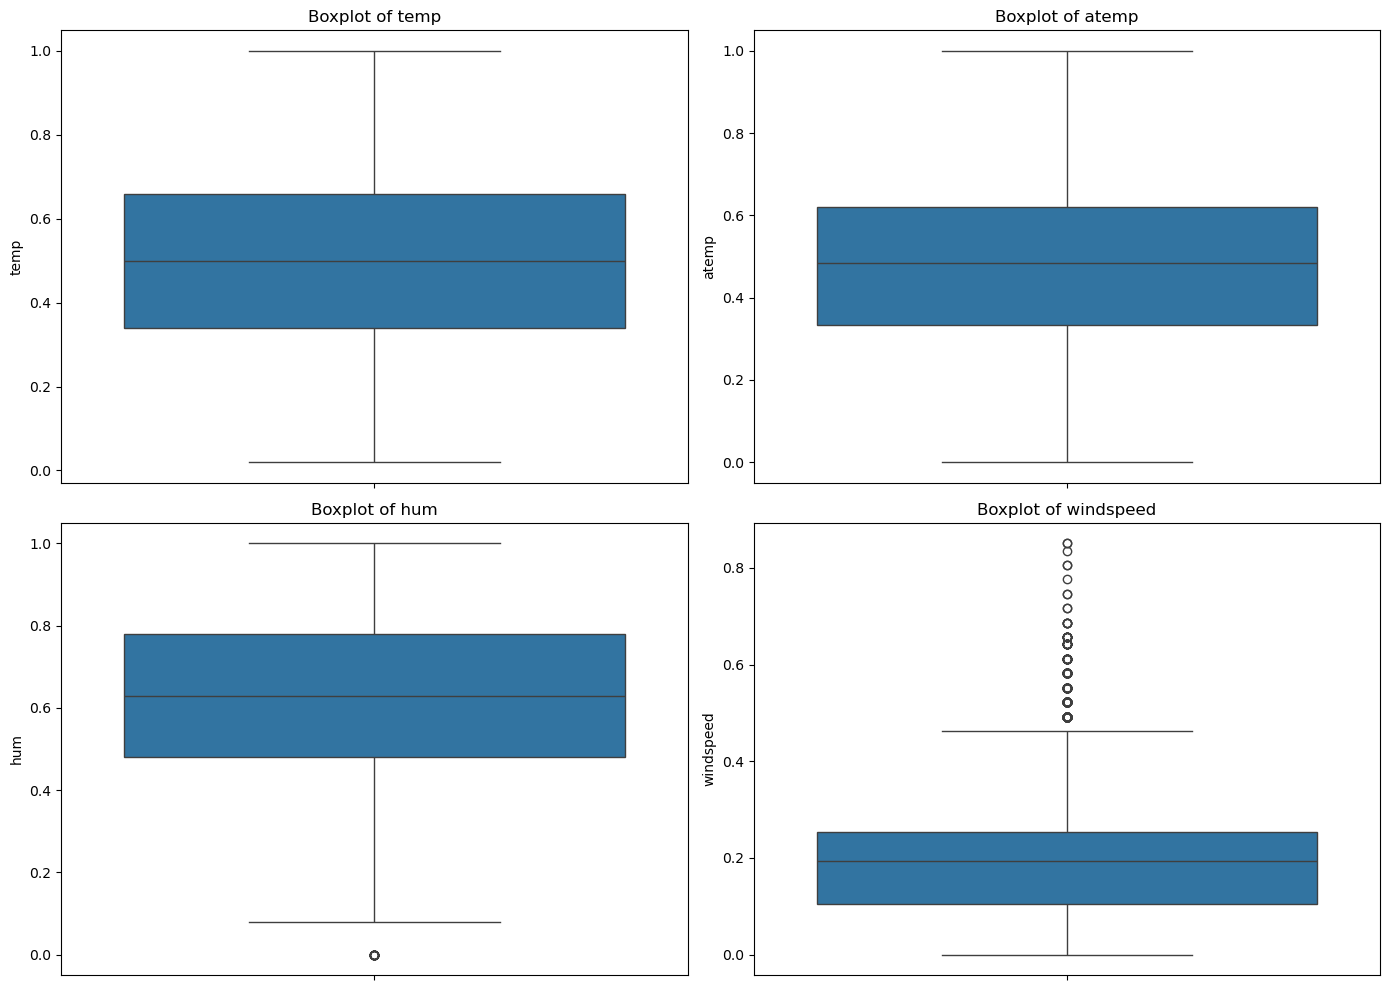

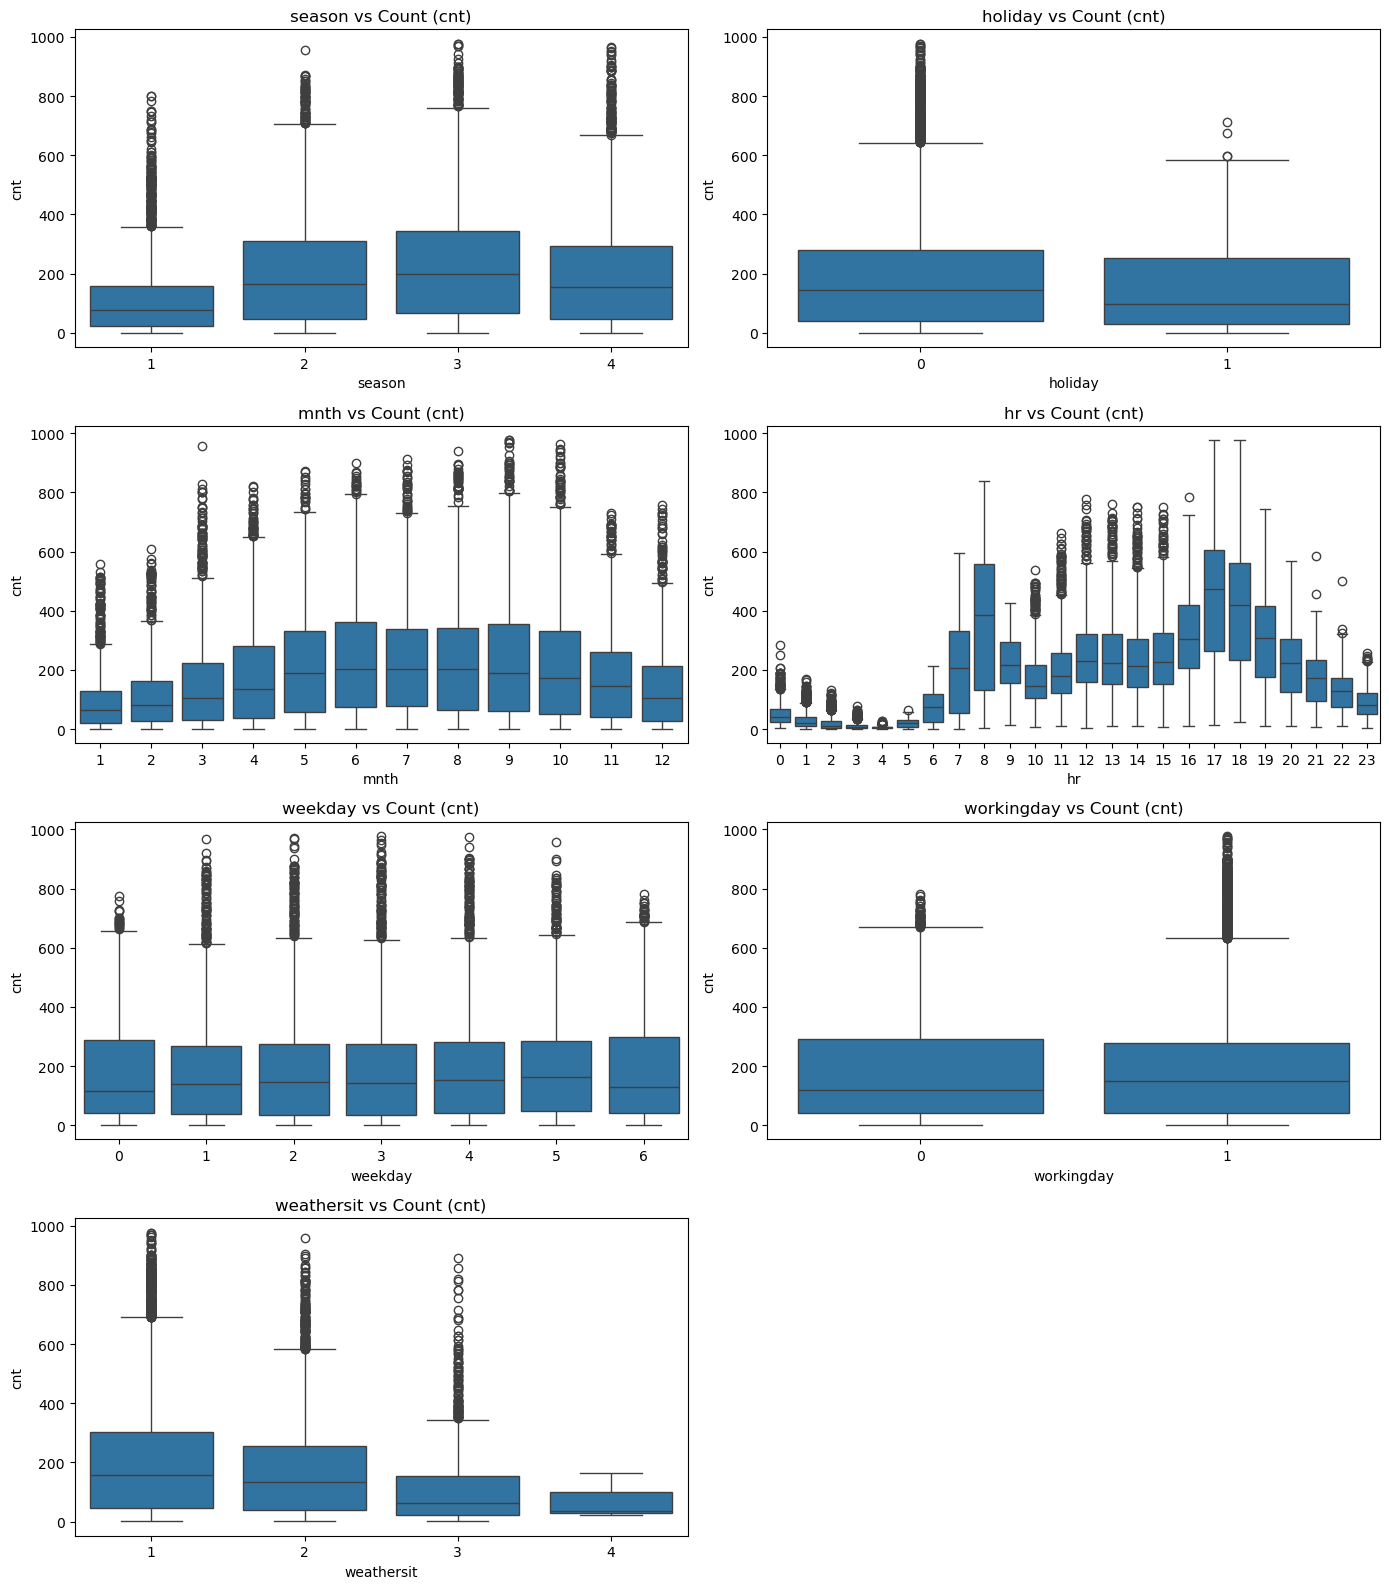

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot Grid for Numerical Features
plt.figure(figsize=(14, 10))  # Adjust figure size
for i, col in enumerate(number_features):
    plt.subplot(2, 2, i + 1)  # Create a grid of 2x2 for numerical features
    sns.boxplot(data=hour_df, y=col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Boxplot Grid for Categorical Features
plt.figure(figsize=(14, 16))  # Adjust figure size
for i, col in enumerate(category_features):
    plt.subplot(4, 2, i + 1)  # Create a grid for categorical features
    sns.boxplot(data=hour_df, x=col, y='cnt')
    plt.title(f"{col} vs Count (cnt)")
plt.tight_layout()
plt.show()


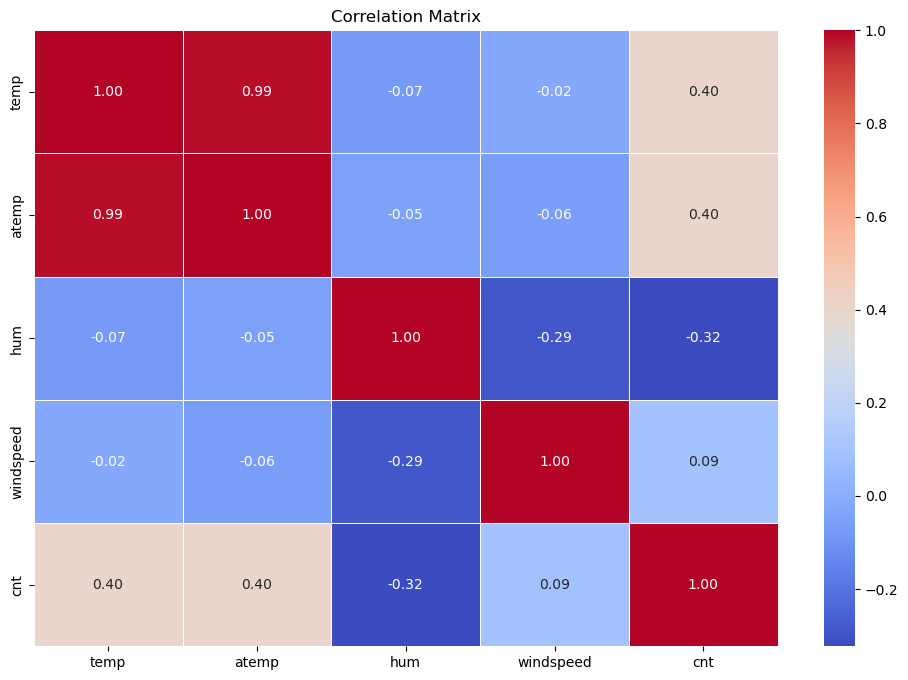

In [9]:
# Compute Correlation Matrix
corr_matrix = hour_df[number_features + target].corr()

# Plot Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
